# 데이터베이스 연동

## MySQL 연동

### 데이터 삽입

In [8]:
import sys, pymysql

#연결 객체 변수 생성
con = None

try:
    #연결
    con = pymysql.connect(host='localhost', port=3306,
                         db='cyberadam', user='user00', passwd='user00',
                         charset='utf8')
    #print(con)
    
    #sql 실행 객체 가져오기
    cursor = con.cursor()
    """
    cursor.execute("insert into usertbl values('winter', '김민정', 2001, '부산','01011111111', '2001-01-01')")
    """
    
    #파라미터 매핑
    cursor.execute("insert into usertbl values(%s,%s,%s,%s,%s,%s)", 
                  ("닝닝", "닝이줘", 2002, "하얼빈", "01022222222","2002-10-23"))
    con.commit()
    
except Exception as e:
    print(e)
    print(sys.exc_info())
finally:
    #연결 해제
    if con != None:
        con.close()

### 데이터 조회

In [13]:
import sys, pymysql

#연결 객체 변수 생성
con = None

try:
    #연결
    con = pymysql.connect(host='localhost', port=3306,
                         db='cyberadam', user='user00', passwd='user00',
                         charset='utf8')
    cursor = con.cursor()
    
    #데이터를 조회하는 SQL
    cursor.execute("select * from usertbl")
    #1개 가져오기
    data = cursor.fetchone()
    for item in data:
        print(item)
    
    
    
except Exception as e:
    print(e)
    print(sys.exc_info())
finally:
    #연결 해제
    if con != None:
        con.close()

karina
유지민
2000
경기도 수원
01000000000
2000-04-11


## Oracle 사용

### 데이터 삽입

In [21]:
import sys, cx_Oracle

#연결 객체 변수 생성
con = None

try:
    #연결
    dsnStr = cx_Oracle.makedsn('localhost', '1521', 'xe')
    con = cx_Oracle.connect(user='system', password='wnddkd',
                         dsn = dsnStr)
    cursor = con.cursor()
    #파라미터 매핑
    cursor.execute("insert into usertbl values(:1, :2, :3, :4, :5, :6)", 
                  ("닝닝", "닝이줘", 2002, "하얼빈", "01022222222", "2001-01-01"))
    con.commit()
    print("삽입 성공")
        
except Exception as e:
    print("데이터베이스 작업 실패")
    print(e)
    print(sys.exc_info())
finally:
    #연결 해제
    if con != None:
        con.close()

데이터베이스 작업 실패
ORA-12541: TNS:리스너가 없습니다.
(<class 'cx_Oracle.DatabaseError'>, DatabaseError(<cx_Oracle._Error object at 0x0000021AEB232D20>), <traceback object at 0x0000021AEB288340>)


## MongoDB

### MongoDB 연결

In [24]:
from pymongo import MongoClient

con = MongoClient('127.0.0.1')

print(con)

MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True)


### 데이터 삽입

In [25]:
from pymongo import MongoClient

con = MongoClient('127.0.0.1')

# 사용할 데이터베이스 연결
db = con.mymongo

# 컬렉션 설정 - 테이블 생성 또는 연결
collect = db.users

#삽입할 데이터 생성 - dict
doc1 = {'empno':'0001', 'ename':'김좌진'}
doc2 = {'empno':'0002', 'ename':'안중근'}
doc3 = {'empno':'0003', 'ename':'유관순'}
doc4 = {'empno':'0004', 'ename':'장준하'}

collect.insert_one(doc1)
collect.insert_one(doc2)
collect.insert_many([doc3, doc4])

### 데이터 조회

In [28]:
from pymongo import MongoClient

con = MongoClient('127.0.0.1')

# 사용할 데이터베이스 연결
db = con.mymongo

# 컬렉션 설정 - 테이블 생성 또는 연결
collect = db.users

#조회
result = collect.find()

for temp in result:
    print(temp)
    print(type(temp['_id']))

{'_id': ObjectId('62008979539807c83c2b9409'), 'empno': '0001', 'ename': '김좌진'}
<class 'bson.objectid.ObjectId'>
{'_id': ObjectId('62008979539807c83c2b940a'), 'empno': '0002', 'ename': '안중근'}
<class 'bson.objectid.ObjectId'>
{'_id': ObjectId('62008979539807c83c2b940b'), 'empno': '0003', 'ename': '유관순'}
<class 'bson.objectid.ObjectId'>
{'_id': ObjectId('62008979539807c83c2b940c'), 'empno': '0004', 'ename': '장준하'}
<class 'bson.objectid.ObjectId'>


# 웹에서 데이터 가져오기

## 기본 패키지 이용

### 웹에 요청하고 가져오기

In [32]:
import urllib.request

#데이터 읽기
response = urllib.request.urlopen('https://www.daum.net')
#바이트 배열
data = response.read()

#읽어온 데이터의 인코딩 확인
encoding = response.info().get_content_charset()

#인코딩 설정
html = data.decode('utf8')
print(html)

<!DOCTYPE html><html lang="ko"> <head> <meta charset="utf-8" /> <title>Daum</title> <meta http-equiv="x-ua-compatible" content="IE=edge" /> <meta property="og:url" content="//www.daum.net/" /> <meta property="og:type" content="website" /> <meta property="og:title" content="Daum" /> <meta http-equiv="Pragma" content="no-cache" /> <meta http-equiv="Expires" content="-1" /> <meta name="referrer" content="origin" /> <meta property="og:image" content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001" /> <meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum" /> <meta name="msapplication-task" content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favicon.ico" /> <meta name="msapplication-task" content="name=미디어다음;action-uri=//news.daum.net/;icon-uri=/media_favicon.ico" /> <meta name="msapplication-task" content="name=메일;action-uri=//mail.daum.net;icon-uri=/mail_favicon.ico" /> <link href="https://t1.daumcdn.net/top/favicon.ico" rel="shortcut icon" /> <met

### 파라미터 인코딩

In [33]:
#파라미터에 한글이 있어서 에러
import urllib.request

#데이터 읽기
response = urllib.request.urlopen('https://search.hani.co.kr/Search?command=query&keyword=코로나&sort=d&period=all&datefrom=1988.01.01&dateto=2022.02.07&media=news')
#바이트 배열
data = response.read()

#읽어온 데이터의 인코딩 확인
encoding = response.info().get_content_charset()

#인코딩 설정
html = data.decode('utf8')
print(html)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 34-36: ordinal not in range(128)

In [35]:
import urllib.request
#파라미터 인코딩을 위한 모듈
from urllib.parse import quote

keyword = quote('코로나')

#데이터 읽기
response = urllib.request.urlopen(
    'https://search.hani.co.kr/Search?command=query&keyword=' 
    + keyword + 
    '&sort=d&period=all&datefrom=1988.01.01&dateto=2022.02.07&media=news')
#바이트 배열
data = response.read()

#읽어온 데이터의 인코딩 확인
encoding = response.info().get_content_charset()

#인코딩 설정
html = data.decode('utf8')
print(html)












<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!--[if IE]><![endif]-->
<!--[if lt IE 7 ]><html class="no-js ie6" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 7 ]><html class="no-js ie7" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 8 ]><html class="no-js ie8" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 9 ]><html class="no-js ie9" xmlns:fb="http://ogp.me/ns/fb#" lang="ko" xml:lang="ko"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" xmlns:fb="http://ogp.me/ns/fb#" lang="ko" xml:lang="ko">
<!--<![endif]-->
<head>
<meta name="google-site-verification" content="-FbcGJL6VLefS4uRfDR1U-NYpWg1gPzAgE7YPGk5M-c" />
<link rel="shortcut i

## requests 모듈 이용하기

In [37]:
#텍스트 가져오기
import requests

response = requests.get("https://www.naver.com")
#print(response.text)

response = requests.get("http://www.tjoeun.co.kr")
print(response.text)


<!doctype html>
<html lang="ko">
<head>
	<title>더조은컴퓨터아카데미</title>
	<meta property="og:type" content="website">
	<meta property="og:url" content="http://www.tjoeun.co.kr">
	<meta property="og:image" content="http://www.tjoeun.co.kr/images/tjdpimg.jpg">
	<meta property="og:title" content="더조은컴퓨터아카데미">
	<meta property="og:description" content="국비지원 컴퓨터학원, 국비전액무료, IT/디자인 전문교육, 전산세무회계, 1:1취업지원">
	<meta name="Description" content="국비지원 컴퓨터학원, 국비전액무료, IT/디자인 전문교육, 전산세무회계, 1:1취업지원"/>
<meta charset="euc-kr" />
<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">
<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=medium-dpi">



<!--meta name="google-site-verification" content="LWa-oO6JWr68MO8QR5_Gnie-aRyX6HTj2ogNVmCOpsw" /-->
<meta name="google-site-verification" content="sS2OrG0YJUH90QVsBKm7d0xx9r1O5cu6bJpXKq-z9nY" />
<meta name="ROBOTS" content="all" />
<meta name="NaverBot" content="ALL

In [39]:
#이미지 가져와서 저장하기
import requests

imgurl = "https://w.namu.la/s/763ab0cc947d94171545ee46b21b388d72af994339d94650047ef8362aba6b6ffda89a717f6d23b6cb341520ab7c02f8e48e206c54221e3c2e34d921eaac8309d60459bd0bcd4d12051352f166cc84934177637c951fbadf96c514c61a5ea3e4"
response = requests.get(imgurl)

with open('./adam.jpg', 'wb') as f:
    img = response.content
    f.write(img)


### JSON 파싱

In [47]:
#카카오 오픈 API 데이터 가져오기 - 카테고리 검색
import requests
import json

url = 'https://dapi.kakao.com/v2/local/search/category.json?category_group_code=PM9&y=37.57002838826&x=126.97962084516&radius=5000'
headers = {'Authorization':'KakaoAK 9f744be87beccbc56482babcfabb1159'}

data = requests.get(url, headers=headers)
#print(data.text)

#json 파싱
result = json.loads(data.text)
#print(type(result))

documents = result["documents"]
#print(documents)

for temp in documents:
    print(temp['place_name'], ":", temp['address_name'])

수도약국 : 서울 종로구 관훈동 37
남시약국 : 서울 중구 남대문로3가 30-15
종각호약국 : 서울 종로구 종로2가 75-6
광화문123약국 : 서울 종로구 청진동 215-4
청실약국 : 서울 중구 무교동 32-2
광교약국 : 서울 종로구 관철동 287
평화약국 : 서울 중구 남대문로4가 18-11
삼원약국 : 서울 종로구 신문로1가 1-1
새원약국 : 서울 중구 명동1가 33
제일약국 : 서울 종로구 청진동 41-2
송송약국 : 서울 종로구 청진동 146
청계약국 : 서울 중구 무교동 77
광화문윤약국 : 서울 종로구 세종로 202-1
수약국 : 서울 종로구 청진동 70
종로엔약국 : 서울 종로구 종로2가 8-4


## HTML Parsing

In [52]:
#https://tv.naver.com/r/  에서 타이틀 가져오기
import requests, bs4

#html 가져오기
response = requests.get('https://tv.naver.com/r/')
html = response.text

#html을 메모리 펼치기
bs = bs4.BeautifulSoup(html, 'html.parser')
#print(bs)

#필요한 데이터 선택
tags = bs.select('a > strong > span')

for tag in tags:
    print(tag.getText())

tags = bs.select('dl > dt > a > tooltip')

for tag in tags:
    print(tag.getText())

‘드디어 터진 2호골’ 리오넬 메시의 감각적인 추가골 [릴 vs PSG]
[영상] 발리예바, ‘금빛’ 4회전 점프…실수에도 탁월해! - 피겨 단체 여자프리
[선공개] 유독 긴장한 '37호' & 편안하고 즐거운 무대를 준비한 '31호'🎤
[선공개] ‘캐나다댁’ 선예, 충격 일탈 사건의 이야기는?! (ft. 다혈질 부부)
[최초 공개] 모두를 들썩이게 한 영탁의 건달춤?! '전복 먹으러 갈래~♪' 신곡에 찰떡인 안
[신현준네] 8개월 비타민서의 ‘폭풍 배밀이’ 현장! | KBS 220206 방송
[영상] "경쟁자는 바로 나" 발리예바, 실수에도 침착하게! (피겨 단체전 여자 프리)
16화#하이라이트# 세상 단 둘 뿐인 불가살 연인, 이진욱X권나라의 천 년의 사랑♡
"수치스럽다" 美서 태어난 中 피겨선수 넘어지자 쏟아진 조롱
김호중 ‘그대 향한 사랑’ ♫ 본업도 완벽..❤
[선공개] 유이 협박하는 이태성에 냅다 주먹 날리는 정지훈X김범!
노래에 진정성이 없어! 진정성을 위해 장민호 주리 트는 사이코러스??..OMG | tvN 220206 방송
[티저] 형들 볼려고 나인우가 찾아왔어염❤️ 당돌한 막둥이의 애정표현에 멤버들은 당황☺️ㅋㅋ | KBS 방송
[Serie A] '보물이 들어왔네' 이적생 블라호비치의 데뷔골!
"중국에 특혜" 국제심판도 이해 못한 &#39;노터치 금메달&#39;
클래식 아기 자장가모음 무료듣기 수면음악 입니다. classical music
스팸과 참치 요리중 제일맛있어요 /명절에 들어온 참치,스팸 활용요리
[라리가] 23R 바르셀로나 vs AT 마드리드 골모음
[라리가] 8년만에 바르셀로나 복귀골, 다니 알베스
[2회 선공개] 강호동팀vs은지원팀 팀명 공개! 시작부터 신경전 불타오르네♨
＂이게 다 날 위한 거라고?＂ 선을 넘어 개입하는 이일화에게 분노하는 지현우! | KBS 220206 방송
[가로직캠] 이찬원 - 모든 날, 모든 순간(Lee Chan won - FAN CAM) | KBS 방송
다시 태어나도 이솔로몬 하자..💖 ‘내 사람’♬ T

In [72]:
# 기상청 오늘의 날씨 사이트에서 지점 과 체감온도, 습도, 풍속 가져오기
import requests, bs4

#html 확인
response = requests.get(
    'https://www.weather.go.kr/weather/observation/currentweather.jsp')
#print(response.text)

soup = bs4.BeautifulSoup(response.text, 'html.parser')
#print(soup)

#원하는 정보가 있는 테이블을 선택
table = soup.select('.table_develop3')

#테이블의 각 행을 전부 추출
for temp in table[0].find_all('tr'):
    #각 줄의 각 칸들을 list로 변환
    tds = list(temp.find_all('td'))
    #list 순회
    for td in tds:
        if td.find('a'):
            print(td.find('a').get('href'), ":", tds[7].text, ":", tds[10].text,
                 ":", tds[11].text)
        
    

/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=105 : 2.8 : 32 : 동남동
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=259 : -0.3 : 34 : 북북서
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=201 : -3.1 : 37 : 서
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=294 : 4.2 : 26 : 서북서
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=284 : 1.0 : 18 : 북
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=283 : 0.8 : 19 : 북북서
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=185 : -0.4 : 59 : 북
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&type=t99&mode=0&reg=100&auto_man=m&stn=172 : -4.2 : 34 : 북북서
/weather/observation/currentweather.jsp?tm=2022.2.7.16:00&

## XML 파싱

### 동아일보 전체 기사 파싱

In [76]:
import requests, bs4

#html 확인
response = requests.get('https://rss.donga.com/total.xml')
#print(response.text)

rss = bs4.BeautifulSoup(response.text, 'lxml-xml')
#print(rss)

#item 태그 안의 title 추출
items = rss.find_all('item')
#print(items)

for item in items:
    print(item.find('title').getText())

홍남기, 여야 추경 증액 요구에 “받아들이면 무책임한 행동”
‘웰컴투비디오’ 운영 손정우, 범죄수익은닉 혐의로 다시 재판에
백화점·마트 판촉·호객 금지 첫날…일부 매장 여전히 고객 붙잡아
친구들과 모여 학사모 쓰고 찰칵…코로나 속 ‘셀프 졸업 사진’이 뜬다
당국 “고위험군, 4차 접종 계획”…이르면 오는 3월부터 접종
‘김만배 녹취록’에…윤석열 “10년 동안 차 한 잔도 안 해”
尹 “주52시간, 업무 종류 따라 노사합의로 유연화 시켜야”
“이겨 내기 위한 준비돼있어”…암 투병 딛고 금메달 딴 맥스 패럿
관가에도 코로나 확산세…안경덕 장관·고승범 금융위장도 확진 판정
신문에선 못 볼 재미있는 베이징 올림픽 사진들[청계천 옆 사진관]
작년 IPO 공모액  20조 육박…1년새 333.9% 늘며 ‘역대 최대’
“당황하지 말고 준비하자!” 총 든 우크라이나 여성[청계천 옆 사진관]
[퇴근길 한 컷]장벽이 만든 두 세상
“보이지 않는 총리”…‘우크라 갈등’ 손놓고 있는 숄츠에 국내외 비판 쇄도
오미크론 대응 검사체계 변경 후 더 혼잡한 검사소[청계천 옆 사진관]
볼보, ‘노스볼트’와 스웨덴 예테보리 배터리 공장 조성… 오는 2025년 준공 목표
SBS 라디오 PD 하차 논란…與 “선거법 저촉” 野 “언론 재갈 물리기”
알록달록 텐트에 모인 강태공들…빙어낚시, 입춘에도 계속 [청계천 옆 사진관]
대선 앞두고 확진자 폭증…질병청장 “현장 투표도 고려”
野 “김혜경, 관용차 사적 이용”…與 “사실무근, 사과하라”
“뼈 보이게 말랐다” 러 선수, 中올림픽 ‘부실식단’ 폭로
한국파파존스, 굿네이버스와 업무협약…올해도 기부 세트 출시
美유엔대사 “中, 위구르인 성화봉송은 인권문제 관심 돌리려는 것”
당국 “요양병원 4차 접종 검토…노바백스 접종 독려”
‘지우학 빌런’ 유인수, 대세…SNS 팔로워 100만 돌파
혼자놀다 치아 부러졌다더니…CCTV에 ‘보육교사 발길질’ 찍혀
SK텔레콤, 美 조비 에비에이션과 손잡고 도심항공모빌리티 사업 협력
농협중앙회, 교육지원부문 경영협약식 개최


## selenium 

In [77]:
### 크롬 실행
from selenium import webdriver

#드라이버 경로를 설정하면 크롬이 실행됩니다.
driver=webdriver.Chrome('c:\\lecture\\chromedriver')

C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3879845513.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:\\lecture\\chromedriver')


In [88]:
#다음 로그인 하기
### 크롬 실행
from selenium import webdriver

#드라이버 경로를 설정하면 크롬이 실행됩니다.
driver=webdriver.Chrome('c:\\lecture\\chromedriver')

#다음 로그인 페이지로 이동
driver.get('https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net')

#5초대기
driver.implicitly_wait(5)

#아이디 와 비밀번호 입력
driver.find_element_by_xpath('//*[@id="id"]').send_keys('ggangpae3')
driver.find_element_by_xpath('//*[@id="inputPwd"]').send_keys('cyberadam')

#로그인 버튼을 찾아서 클릭
driver.find_element_by_xpath('//*[@id="loginBtn"]').click()


C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3031525757.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:\\lecture\\chromedriver')
C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3031525757.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="id"]').send_keys('ggangpae3')
C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3031525757.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="inputPwd"]').send_keys('cyberadam')
C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3031525757.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="loginBtn"]').click()
C:\Users\tj\AppData\Local\Temp/ipykernel_3820/3031525757.py:23: DeprecationWarning: find_element_by_

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="cafeWrap"]/div/div[1]/div[2]/ul/li[1]/a/span"}
  (Session info: chrome=97.0.4692.99)
Stacktrace:
Backtrace:
	Ordinal0 [0x007CFDC3+2555331]
	Ordinal0 [0x007677F1+2127857]
	Ordinal0 [0x00662E08+1060360]
	Ordinal0 [0x0068E49E+1238174]
	Ordinal0 [0x0068E69B+1238683]
	Ordinal0 [0x006B9252+1413714]
	Ordinal0 [0x006A7B54+1342292]
	Ordinal0 [0x006B75FA+1406458]
	Ordinal0 [0x006A7976+1341814]
	Ordinal0 [0x006836B6+1193654]
	Ordinal0 [0x00684546+1197382]
	GetHandleVerifier [0x00969622+1619522]
	GetHandleVerifier [0x00A1882C+2336844]
	GetHandleVerifier [0x008623E1+541697]
	GetHandleVerifier [0x00861443+537699]
	Ordinal0 [0x0076D18E+2150798]
	Ordinal0 [0x00771518+2168088]
	Ordinal0 [0x00771660+2168416]
	Ordinal0 [0x0077B330+2208560]
	BaseThreadInitThunk [0x7515FA29+25]
	RtlGetAppContainerNamedObjectPath [0x770D7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x770D7A6E+238]


### 브라우저를 출력하지 않고 가져오기

C:\Users\tj\AppData\Local\Temp/ipykernel_3820/586585536.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:\\lecture\\chromedriver', options=options)


<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/97.0.4692.99 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twit
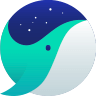
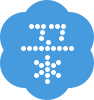

In [90]:
#다음 로그인 하기
### 크롬 실행
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument('disable-gpu')

#드라이버 경로를 설정하면 크롬이 실행됩니다.
driver=webdriver.Chrome('c:\\lecture\\chromedriver', options=options)

driver.get('https://www.naver.com')

print(driver.page_source)

In [91]:

#유투브 스크롤
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

#드라이버 경로를 설정하면 크롬이 실행됩니다.
driver=webdriver.Chrome('c:\\lecture\\chromedriver')

driver.get('https://www.youtube.com')

body = driver.find_element_by_tag_name('body')

time.sleep(10)

body.send_keys(Keys.PAGE_DOWN)

time.sleep(10)

body.send_keys(Keys.PAGE_DOWN)

C:\Users\tj\AppData\Local\Temp/ipykernel_3820/1532709184.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('c:\\lecture\\chromedriver')
C:\Users\tj\AppData\Local\Temp/ipykernel_3820/1532709184.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  body = driver.find_element_by_tag_name('body')
